# Лабораторная работа №5 Лисин РТ5-61Б

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('pokemon.csv', sep = ",")

In [3]:
data.head()

,Number,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80


In [4]:
data = data.drop('Name', 1)
data = data.drop('Number', 1)
data = data.drop('Total', 1)

In [5]:
data = pd.get_dummies(data)

In [6]:
data.head()

,HP,Attack,Defense,Special Attack,Special Defense,Speed,Type_BUG,Type_DARK,Type_DRAGON,Type_ELECTRIC,...,Type_GHOST,Type_GRASS,Type_GROUND,Type_ICE,Type_NORMAL,Type_POISON,Type_PSYCHIC,Type_ROCK,Type_STEEL,Type_WATER
0,45,49,49,65,65,45,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,45,49,49,65,65,45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60,62,63,80,80,60,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,60,62,63,80,80,60,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,80,82,83,100,100,80,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
columns = data.columns.tolist()
column = columns.pop(columns.index("HP"))
columns.append(column)

data = data[columns]

## Разделим выборку

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
y_column = "HP"
x_columns = data.columns.tolist()
x_columns.pop(x_columns.index(y_column))

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data[x_columns], data[y_column], test_size = 0.95, random_state = 15)

In [9]:
data.isnull().sum()

Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
Type_BUG           0
Type_DARK          0
Type_DRAGON        0
Type_ELECTRIC      0
Type_FAIRY         0
Type_FIGHTING      0
Type_FIRE          0
Type_FLYING        0
Type_GHOST         0
Type_GRASS         0
Type_GROUND        0
Type_ICE           0
Type_NORMAL        0
Type_POISON        0
Type_PSYCHIC       0
Type_ROCK          0
Type_STEEL         0
Type_WATER         0
HP                 0
dtype: int64

In [10]:
data.dtypes

Attack             int64
Defense            int64
Special Attack     int64
Special Defense    int64
Speed              int64
Type_BUG           uint8
Type_DARK          uint8
Type_DRAGON        uint8
Type_ELECTRIC      uint8
Type_FAIRY         uint8
Type_FIGHTING      uint8
Type_FIRE          uint8
Type_FLYING        uint8
Type_GHOST         uint8
Type_GRASS         uint8
Type_GROUND        uint8
Type_ICE           uint8
Type_NORMAL        uint8
Type_POISON        uint8
Type_PSYCHIC       uint8
Type_ROCK          uint8
Type_STEEL         uint8
Type_WATER         uint8
HP                 int64
dtype: object

## Бэггинг

In [11]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

In [12]:
bagging = BaggingRegressor(n_estimators=15, oob_score=True, random_state=10)
bagging.fit(data_x_train, data_y_train)

BaggingRegressor(n_estimators=15, oob_score=True, random_state=10)

In [13]:
bg_y_pred = bagging.predict(data_x_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, bg_y_pred))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, bg_y_pred))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, bg_y_pred, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, bg_y_pred))

Средняя абсолютная ошибка: 16.76726726726727
Медианная абсолютная ошибка: 12.266666666666666
Среднеквадратичная ошибка: 23.46983777714037
Коэффициент детерминации: 0.07097848149618191


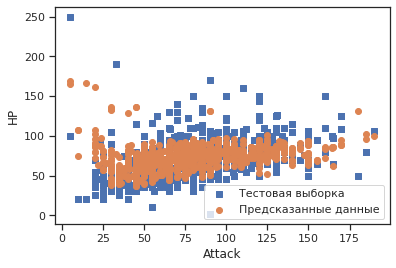

In [15]:
plt.scatter(data_x_test.Attack, data_y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(data_x_test.Attack, bg_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Attack')
plt.ylabel ('HP')
plt.show()

## Случайный лес

In [16]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

forest = RandomForestRegressor(n_estimators=15, oob_score=True, random_state=10)
forest.fit(data_x_train, data_y_train)

RandomForestRegressor(n_estimators=15, oob_score=True, random_state=10)

In [17]:
rf_y_pred = forest.predict(data_x_test)

In [18]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, rf_y_pred))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, rf_y_pred))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, rf_y_pred, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, rf_y_pred))

Средняя абсолютная ошибка: 16.665765765765766
Медианная абсолютная ошибка: 12.400000000000006
Среднеквадратичная ошибка: 23.372059069434705
Коэффициент детерминации: 0.07870323027520587


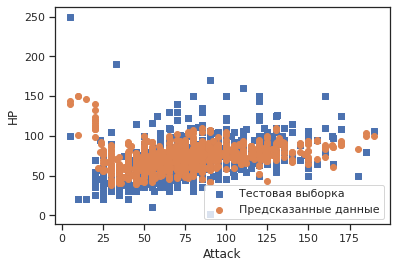

In [19]:
plt.scatter(data_x_test.Attack, data_y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(data_x_test.Attack, rf_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Attack')
plt.ylabel ('HP')
plt.show()

Результаты практически идентичны. Возможно потому что случайный лес как таковой это и есть бэггинг над решающими деревьями